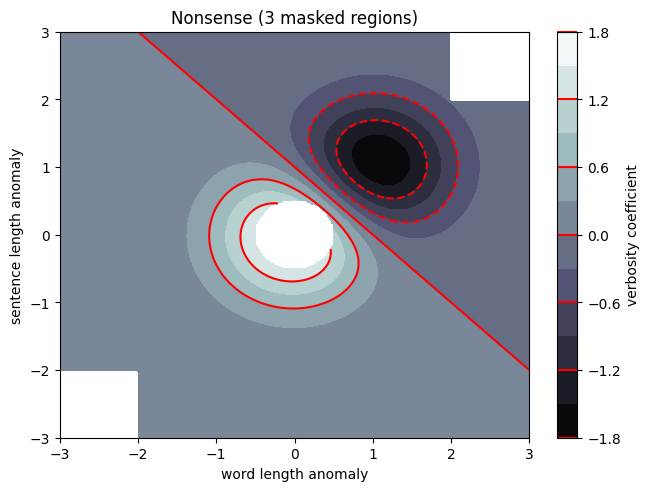

In [7]:
import numpy as np
import matplotlib.pyplot as plt

origin = 'lower'

delta = 0.025

x = y = np.arange(-3.0, 3.01, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

nr, nc = Z.shape

# put NaNs in one corner:
Z[-nr // 6:, -nc // 6:] = np.nan
# contourf will convert these to masked


Z = np.ma.array(Z)
# mask another corner:
Z[:nr // 6, :nc // 6] = np.ma.masked

# mask a circle in the middle:
interior = np.sqrt(X**2 + Y**2) < 0.5
Z[interior] = np.ma.masked


fig1, ax2 = plt.subplots(constrained_layout=True)
CS = ax2.contourf(X, Y, Z, 10, cmap=plt.cm.bone, origin=origin)

# Note that in the following, we explicitly pass in a subset of the contour
# levels used for the filled contours.  Alternatively, we could pass in
# additional levels to provide extra resolution, or leave out the *levels*
# keyword argument to use all of the original levels.

CS2 = ax2.contour(CS, levels=CS.levels[::2], colors='r', origin=origin)

ax2.set_title('Nonsense (3 masked regions)')
ax2.set_xlabel('word length anomaly')
ax2.set_ylabel('sentence length anomaly')

# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel('verbosity coefficient')
# Add the contour line levels to the colorbar
cbar.add_lines(CS2)

/tmp/ipykernel_2718/2606716978.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


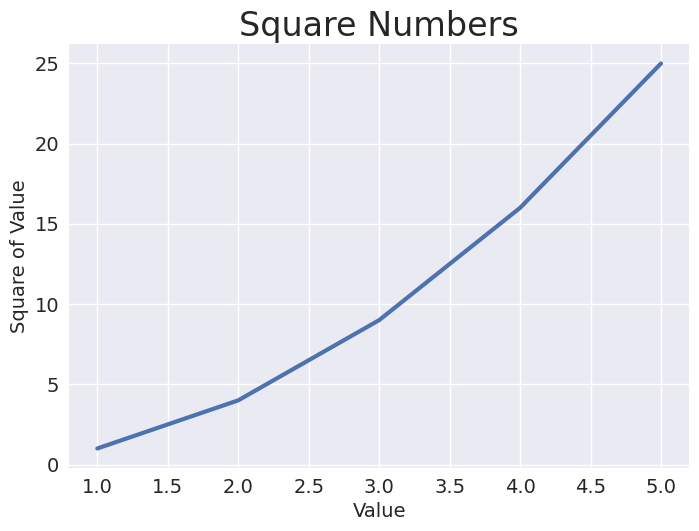

In [8]:
import matplotlib.pyplot as plt

input_values = [1, 2, 3, 4, 5]
squares = [1, 4, 9, 16, 25]

plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.plot(input_values, squares, linewidth=3)

# Set chart title and label axes.
ax.set_title("Square Numbers", fontsize=24)
ax.set_xlabel("Value", fontsize=14)
ax.set_ylabel("Square of Value", fontsize=14)

# Set size of tick labels.
ax.tick_params(axis='both', labelsize=14)

plt.show()


/tmp/ipykernel_2718/2321173582.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


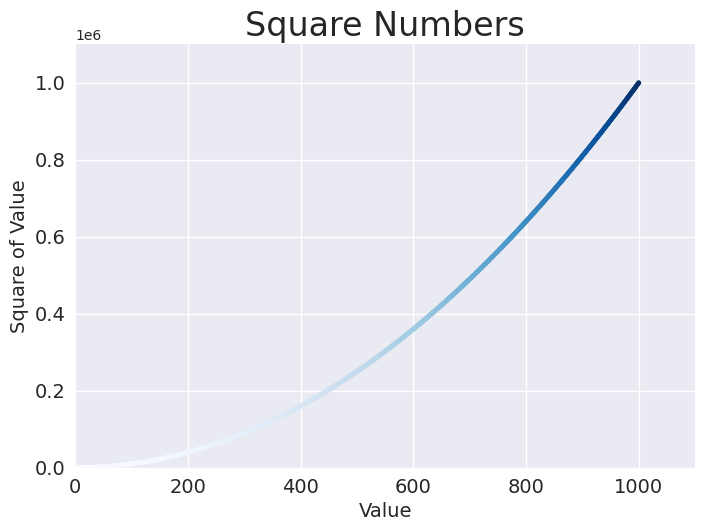

In [9]:
import matplotlib.pyplot as plt

x_values = range(1, 1001)
y_values = [x**2 for x in x_values]

plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.scatter(x_values, y_values, c=y_values, cmap=plt.cm.Blues, s=10)

# Set chart title and label axes.
ax.set_title("Square Numbers", fontsize=24)
ax.set_xlabel("Value", fontsize=14)
ax.set_ylabel("Square of Value", fontsize=14)

# Set size of tick labels.
ax.tick_params(axis='both', which='major', labelsize=14)

# Set the range for each axis.
ax.axis([0, 1100, 0, 1100000])

plt.show()

In [11]:
from random import choice

class RandomWalk:
    """A class to generate random walks."""
    
    def __init__(self, num_points=5000):
        """Initialize attributes of a walk."""
        self.num_points = num_points
        
        # All walks start at (0, 0).
        self.x_values = [0]
        self.y_values = [0]

    def fill_walk(self):
        """Calculate all the points in the walk."""
    
        # Keep taking steps until the walk reaches the desired length.
        while len(self.x_values) < self.num_points:
        
            # Decide which direction to go and how far to go in that direction.
            x_direction = choice([1, -1])
            x_distance = choice([0, 1, 2, 3, 4])
            x_step = x_direction * x_distance
        
            y_direction = choice([1, -1])
            y_distance = choice([0, 1, 2, 3, 4])
            y_step = y_direction * y_distance
        
            # Reject moves that go nowhere.
            if x_step == 0 and y_step == 0:
                continue
        
            # Calculate the new position.
            x = self.x_values[-1] + x_step
            y = self.y_values[-1] + y_step
        
            self.x_values.append(x)
            self.y_values.append(y)


In [12]:
import matplotlib.pyplot as plt

from random_walk import RandomWalk

# Keep making new walks, as long as the program is active.
while True:
    # Make a random walk.
    rw = RandomWalk(50_000)
    rw.fill_walk()

    # Plot the points in the walk.
    plt.style.use('classic')
    fig, ax = plt.subplots(figsize=(15, 9))
    point_numbers = range(rw.num_points)
    ax.scatter(rw.x_values, rw.y_values, c=point_numbers, cmap=plt.cm.Blues,
        edgecolors='none', s=1)

    # Emphasize the first and last points.
    ax.scatter(0, 0, c='green', edgecolors='none', s=100)
    ax.scatter(rw.x_values[-1], rw.y_values[-1], c='red', edgecolors='none',
        s=100)

    # Remove the axes.
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    plt.show()

    keep_running = input("Make another walk? (y/n): ")
    if keep_running == 'n':
        break


ModuleNotFoundError: No module named 'random_walk'

In [15]:
from random import randint

class Die:
    """A class representing a single die."""
    
    def __init__(self, num_sides=6):
        """Assume a six-sided die."""
        self.num_sides = num_sides
        
    def roll(self):
        """"Return a random value between 1 and number of sides."""
        return randint(1, self.num_sides)

In [18]:
from random import randint

class Die:
    """A class representing a single die."""
    
    def __init__(self, num_sides=6):
        """Assume a six-sided die."""
        self.num_sides = num_sides
        
    def roll(self):
        """"Return a random value between 1 and number of sides."""
        return randint(1, self.num_sides)

from plotly.graph_objs import Bar, Layout
from plotly import offline

from die import Die

# Create a D6 and a D10.
die_1 = Die()
die_2 = Die(10)

# Make some rolls, and store results in a list.
results = []
for roll_num in range(50_000):
    result = die_1.roll() + die_2.roll()
    results.append(result)
    
# Analyze the results.
frequencies = []
max_result = die_1.num_sides + die_2.num_sides
for value in range(2, max_result+1):
    frequency = results.count(value)
    frequencies.append(frequency)
    
# Visualize the results.
x_values = list(range(2, max_result+1))
data = [Bar(x=x_values, y=frequencies)]

x_axis_config = {'title': 'Result', 'dtick': 1}
y_axis_config = {'title': 'Frequency of Result'}
my_layout = Layout(title='Results of rolling a D6 and a D10 50000 times',
        xaxis=x_axis_config, yaxis=y_axis_config)
offline.plot({'data': data, 'layout': my_layout}, filename='d6_d10.html')

ModuleNotFoundError: No module named 'die'

/tmp/ipykernel_3018/949047616.py:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


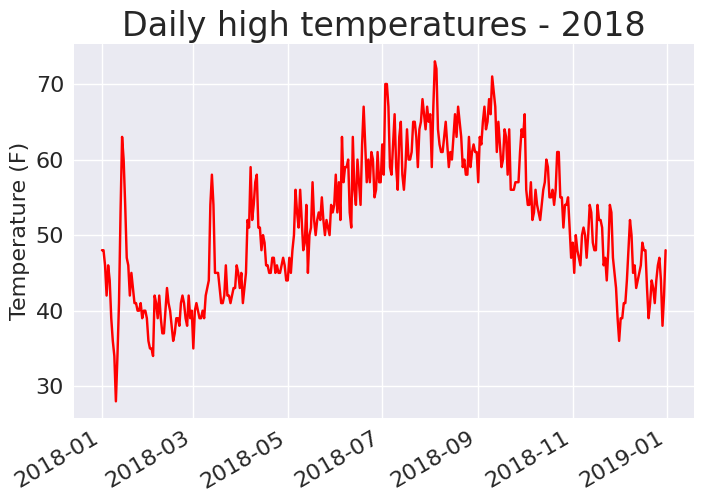

In [1]:
import csv
from datetime import datetime

from matplotlib import pyplot as plt

filename = '/root/py/pcc_2e/chapter_16/the_csv_file_format/revisions_printing_4/data/sitka_weather_2018_simple.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)

    # Get dates and high temperatures from this file.
    dates, highs = [], []
    for row in reader:
        current_date = datetime.strptime(row[2], '%Y-%m-%d')
        dates.append(current_date)
        high = int(row[5])
        highs.append(high)

# Plot the high temperatures.
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.plot(dates, highs, c='red')

# Format plot.
plt.title("Daily high temperatures - 2018", fontsize=24)
plt.xlabel('', fontsize=16)
fig.autofmt_xdate()
plt.ylabel("Temperature (F)", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.show()

In [ ]:
import csv
from datetime import datetime

from matplotlib import pyplot as plt

filename = '/root/py/pcc_2e/chapter_16/the_csv_file_format/revisions_printing_4/data/sitka_weather_2018_simple.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)

    # Get dates and high temperatures from this file.
    dates, highs = [], []
    for row in reader:
        current_date = datetime.strptime(row[2], '%Y-%m-%d')
        dates.append(current_date)
        high = int(row[5])
        highs.append(high)

# Plot the high temperatures.
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.plot(dates, highs, c='red')

# Format plot.
ax.set_title("Daily high temperatures - 2018", fontsize=24)
ax.set_xlabel('', fontsize=16)
fig.autofmt_xdate()
ax.set_ylabel("Temperature (F)", fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)

plt.show()